# 2022 NZMSA Data Science Submission.

In [651]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [652]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [653]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [654]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   station         103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

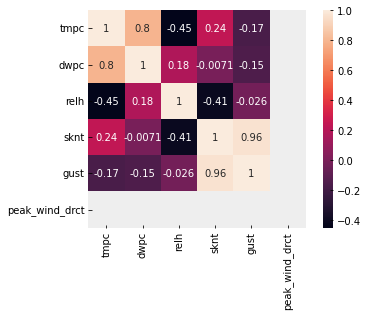

In [655]:
sns.heatmap(dataset.corr(), annot=True, square=True)


In [656]:
from cmath import nan


dataset["dateInt"] = pd.to_datetime(dataset["valid"])
dataset["date"] = dataset.dateInt.apply(lambda x: x.strftime("%Y%m%d%H%M")).astype("int64")

C:\Users\danie\AppData\Local\Temp\ipykernel_21732\2484238578.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


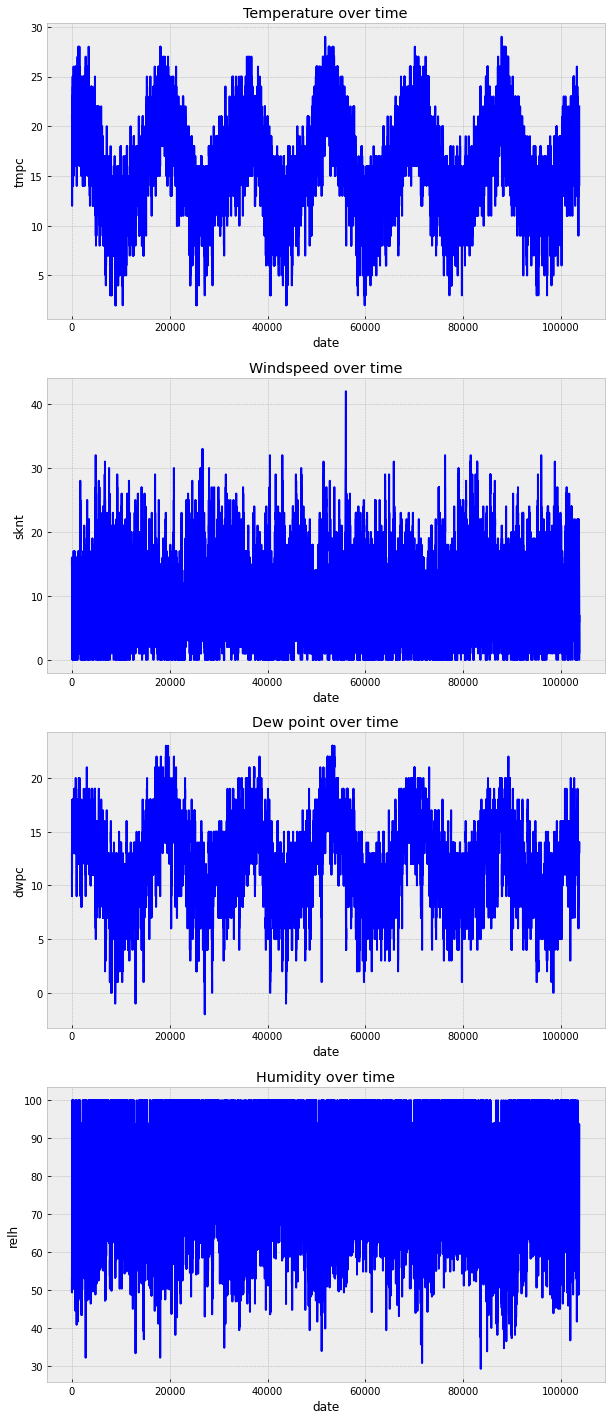

In [658]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)
ax1.plot(dataset.index, dataset["tmpc"], color="blue")
ax1.set_title("Temperature over time")
ax1.set_xlabel("date")
ax1.set_ylabel("tmpc")

ax2.plot(dataset.index, dataset["sknt"], color="blue")
ax2.set_title("Windspeed over time")
ax2.set_xlabel("date")
ax2.set_ylabel("sknt")

ax3.plot(dataset.index, dataset["dwpc"], color="blue")
ax3.set_title("Dew point over time")
ax3.set_xlabel("date")
ax3.set_ylabel("dwpc")

ax4.plot(dataset.index, dataset["relh"], color="blue")
ax4.set_title("Humidity over time")
ax4.set_xlabel("date")
ax4.set_ylabel("relh")

fig.set_size_inches(10,25)

fig.show()

# Comments
Comparing all the values overtime shows which had a higher correlation to time. 
The data looks most consistent for temperature overtime, with a clearer trend shown. Incomparison to 


# Data Processing

In [622]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [623]:
dataset.head() # Show the first five results.


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [624]:
dataset.drop(columns=["peak_wind_drct", "station", "gust"], inplace=True)
dataset.head()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   valid   103713 non-null  object 
 1   tmpc    103678 non-null  float64
 2   dwpc    103678 non-null  float64
 3   relh    103593 non-null  float64
 4   sknt    103704 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.0+ MB


In [625]:
from cmath import nan


dataset["dateInt"] = pd.to_datetime(dataset["valid"])
dataset["date"] = dataset.dateInt.apply(lambda x: x.strftime("%Y%m%d%H%M")).astype("int64")
dataset.drop(columns=["sknt", "dwpc", "dateInt" ], inplace=True)
dataset.info()
dataset.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   valid   103713 non-null  object 
 1   tmpc    103678 non-null  float64
 2   relh    103593 non-null  float64
 3   date    103713 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ MB


,valid,tmpc,relh,date
0,2015-01-01 00:00,21.0,52.77,201501010000
1,2015-01-01 00:30,21.0,49.37,201501010030
2,2015-01-01 01:00,21.0,56.38,201501010100
3,2015-01-01 01:30,21.0,60.21,201501010130
4,2015-01-01 02:00,21.0,56.38,201501010200


In [644]:
dataset["date"].head()

0    201501010000
1    201501010030
2    201501010100
3    201501010130
4    201501010200
Name: date, dtype: int64

In [627]:
dataset = dataset.dropna()
X_train, X_test, y_train, y_test = train_test_split(dataset[["date"]], dataset["tmpc"], test_size=0.2)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103593 entries, 0 to 103712
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   valid   103593 non-null  object 
 1   tmpc    103593 non-null  float64
 2   relh    103593 non-null  float64
 3   date    103593 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 4.0+ MB


In [628]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20719 entries, 58345 to 63885
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    20719 non-null  int64
dtypes: int64(1)
memory usage: 323.7 KB


In [629]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82874 entries, 59442 to 65456
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    82874 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [630]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 82874 entries, 59442 to 65456
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
82874 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [631]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 20719 entries, 58345 to 63885
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
20719 non-null  float64
dtypes: float64(1)
memory usage: 323.7 KB


# Data Modelling

In [632]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.
import pandas as pd

# Just one of the models capable of modelling our dataset.
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [633]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [634]:
model.score(X_test, y_test)

-3.3421727939408896e-05

In [635]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [636]:
model.score(X_test, y_test)

0.7215679075337185

### A RandomForestRegressor fits this model with better accuracy.

In [637]:
model.predict(X_test)


array([ 8.45555667,  7.17191748, 15.39532698, ..., 12.12373241,
       21.87141655, 13.19960088])

In [640]:
oneMonth = pd.read_csv("oneMonth.csv")
oneMonth.head()
oneMonth["monthInt"] = pd.to_datetime(oneMonth["month"])
oneMonth["date"] = oneMonth.monthInt.apply(lambda x: x.strftime("%Y%m%d%H%M")).astype("int64")
oneMonth.head()
oneMonth["predResult"] = model.predict(oneMonth[["date"]])
oneMonth.head()


,month,monthInt,date,predResult
0,2021-01-01 00:00,2021-01-01 00:00:00,202101010000,17.619366
1,2021-01-01 00:30,2021-01-01 00:30:00,202101010030,17.619366
2,2021-01-01 01:00,2021-01-01 01:00:00,202101010100,17.619366
3,2021-01-01 01:30,2021-01-01 01:30:00,202101010130,17.619366
4,2021-01-01 02:00,2021-01-01 02:00:00,202101010200,17.619366


Text(0, 0.5, 'tmpc')

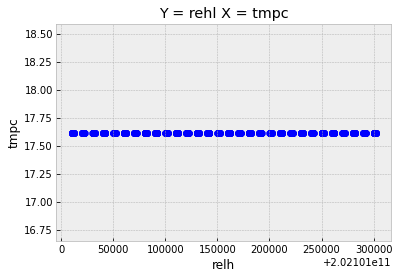

In [643]:
plt.style.use("bmh")

fig, (ax1) = plt.subplots(squeeze=True)
plt.scatter(oneMonth["date"], oneMonth["predResult"], color="blue")
ax1.set_title("Y = rehl X = tmpc")
ax1.set_xlabel("relh")
ax1.set_ylabel("tmpc")

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.